In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Loading dataset
iris_df = datasets.load_iris()

# Available methods on dataset
print(dir(iris_df))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


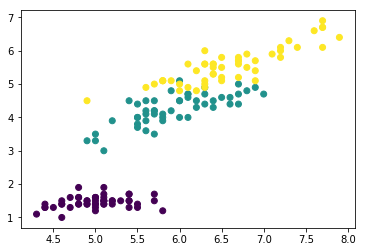

In [3]:
# Dataset Slicing
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 2]  # Sepal Width

# Plotting
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(iris_df.data)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [5]:
# Sum of explained variances of the first two components is 97%
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]

0.9776852063187949

In [6]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [7]:
dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

components = pd.DataFrame(pca.components_,columns=iris_df.feature_names)
components.index = dimensions

variance = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance'])
variance.index = dimensions

pd.concat([variance,components], axis=1)

,Explained Variance,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Dimension 1,0.924619,0.361387,-0.084523,0.856671,0.358289
Dimension 2,0.053066,0.656589,0.730161,-0.173373,-0.075481
Dimension 3,0.017103,-0.582030,0.597911,0.076236,0.545831
Dimension 4,0.005212,-0.315487,0.319723,0.479839,-0.753657


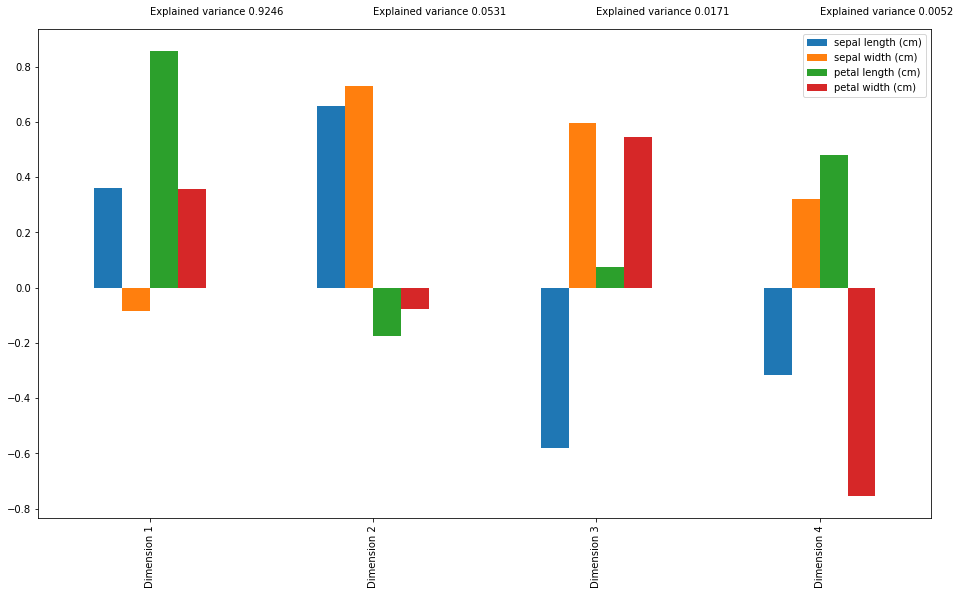

In [8]:
fig, ax = plt.subplots(figsize=(16,9))
components.plot(kind='bar', ax=ax)
ax.set_xticklabels(dimensions)
for i,variance in enumerate(pca.explained_variance_ratio_):
    ax.text(i,ax.get_ylim()[1]+0.05,'Explained variance {}'.format(np.round(variance,4)))
plt.show()

As the variance explained by the first two principal components is ~ 0.97(0.92+0.053) we can say its good to use only the first two principal components.

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(iris_df.data)
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [10]:
transformed_data = pca.transform(iris_df.data)
transformed_data = pd.DataFrame(transformed_data,columns=['Dimension 1','Dimension 2'])
transformed_data.head()

,Dimension 1,Dimension 2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


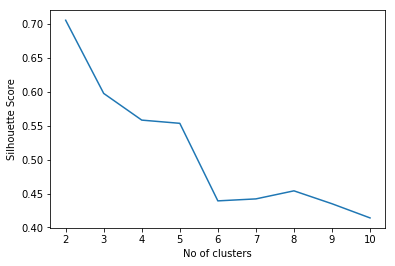

In [11]:
# Use silhouette score to find the ideal number of clusters.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

no_of_clusters= range(2,11)
kmeans = [KMeans(n_clusters=i) for i in no_of_clusters]
score = [silhouette_score(transformed_data,kmeans[i].fit(transformed_data).predict(transformed_data),metric='euclidean') for i in range(len(kmeans))]
plt.plot(no_of_clusters,score)
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Score')
plt.show()

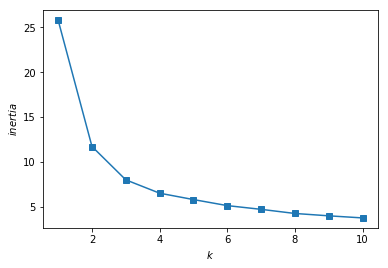

In [12]:
# Use elbow method to find the ideal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(transformed_data)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 11), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$inertia$');

In [13]:
model = KMeans(n_clusters=3)
model.fit(transformed_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
# Prediction on the entire data
all_predictions = model.predict(transformed_data)
print(all_predictions)
print(iris_df.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


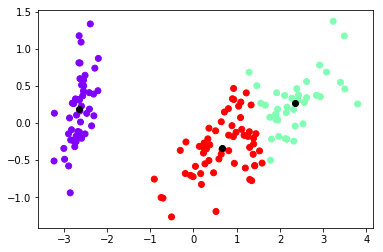

In [15]:
plt.scatter(transformed_data.iloc[:,0],transformed_data.iloc[:,1],c=model.labels_,cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')
plt.show()